### **Workflow**

0. Import importandt libraries
1. Get data ready (turn into tensors)
2. Build A Linear Regression Model
3. Pick A loss function and optimizer
4. Build a training loop
5. Evaulate your model
6. Test Model with a new data point
7. Save the model

## **0. import Important libraries**

In [5]:
import torch
import torch.optim as optim
import seaborn as sns
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

## **1. Get data ready (turn into tensors)**

In [6]:
x_train = np.array([[3.3], [4.4], [5.5], [6.71], [6.93], [4.168],
                    [9.779], [6.182], [7.59], [2.167], [7.042],
                    [10.791], [5.313], [7.997], [3.1]], dtype=np.float32)

y_train = np.array([[1.7], [2.76], [2.09], [3.19], [1.694], [1.573],
                    [3.366], [2.596], [2.53], [1.221], [2.827],
                    [3.465], [1.65], [2.904], [1.3]], dtype=np.float32)

x_train, y_train

(array([[ 3.3  ],
        [ 4.4  ],
        [ 5.5  ],
        [ 6.71 ],
        [ 6.93 ],
        [ 4.168],
        [ 9.779],
        [ 6.182],
        [ 7.59 ],
        [ 2.167],
        [ 7.042],
        [10.791],
        [ 5.313],
        [ 7.997],
        [ 3.1  ]], dtype=float32),
 array([[1.7  ],
        [2.76 ],
        [2.09 ],
        [3.19 ],
        [1.694],
        [1.573],
        [3.366],
        [2.596],
        [2.53 ],
        [1.221],
        [2.827],
        [3.465],
        [1.65 ],
        [2.904],
        [1.3  ]], dtype=float32))

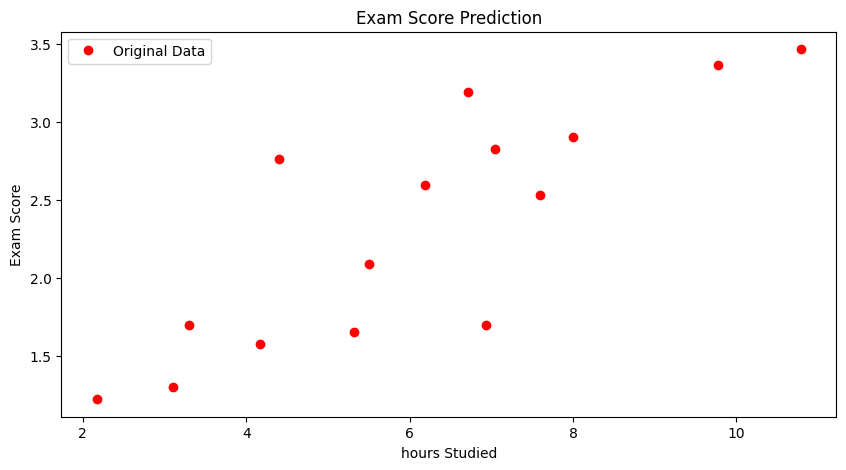

In [7]:
fig=plt.figure(figsize=(10,5))
plt.plot(x_train,y_train,'ro',label='Original Data')
plt.xlabel('hours Studied')
plt.ylabel('Exam Score')
plt.legend()
plt.title('Exam Score Prediction')
plt.show()

X_train we will train our model,we will test our model with new data point 8 hours

In [8]:
x_train=torch.from_numpy(x_train)
y_train=torch.from_numpy(y_train)
x_train,y_train

(tensor([[ 3.3000],
         [ 4.4000],
         [ 5.5000],
         [ 6.7100],
         [ 6.9300],
         [ 4.1680],
         [ 9.7790],
         [ 6.1820],
         [ 7.5900],
         [ 2.1670],
         [ 7.0420],
         [10.7910],
         [ 5.3130],
         [ 7.9970],
         [ 3.1000]]),
 tensor([[1.7000],
         [2.7600],
         [2.0900],
         [3.1900],
         [1.6940],
         [1.5730],
         [3.3660],
         [2.5960],
         [2.5300],
         [1.2210],
         [2.8270],
         [3.4650],
         [1.6500],
         [2.9040],
         [1.3000]]))

## **2. Build a linear Regression Model**

In [9]:
class LinearRegression(nn.Module):
  def __init__(self):
    super().__init__()
    self.linear=nn.Linear(1,1)

  def forward(self,x):
    out=self.linear(x)
    return out

In [10]:
model=LinearRegression() #creating object or (instance) for our class

In [11]:
model

LinearRegression(
  (linear): Linear(in_features=1, out_features=1, bias=True)
)

In [12]:
model.state_dict()

OrderedDict([('linear.weight', tensor([[-0.5043]])),
             ('linear.bias', tensor([-0.1433]))])

In [13]:
list(model.parameters())

[Parameter containing:
 tensor([[-0.5043]], requires_grad=True),
 Parameter containing:
 tensor([-0.1433], requires_grad=True)]

## **3. Pick a Loss function and Optimizer**







In [14]:
criterion=nn.MSELoss()
optimizer=torch.optim.SGD(model.parameters(),lr=1e-4) #0.0001


## **4. Build a training loop**

In [15]:
num_epochs=1000


In [16]:
for epoch in range(num_epochs):
  model.train()
  out=model(x_train)
  loss=criterion(out,y_train)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()
  if (epoch +1 ) % 20 == 0:
    print(f'Epoch: [{epoch +1 } / {num_epochs}],Loss: { loss.item():.6f}')


Epoch: [20 / 1000],Loss: 24.478472
Epoch: [40 / 1000],Loss: 17.371977
Epoch: [60 / 1000],Loss: 12.349479
Epoch: [80 / 1000],Loss: 8.799831
Epoch: [100 / 1000],Loss: 6.291114
Epoch: [120 / 1000],Loss: 4.518068
Epoch: [140 / 1000],Loss: 3.264954
Epoch: [160 / 1000],Loss: 2.379300
Epoch: [180 / 1000],Loss: 1.753345
Epoch: [200 / 1000],Loss: 1.310933
Epoch: [220 / 1000],Loss: 0.998236
Epoch: [240 / 1000],Loss: 0.777218
Epoch: [260 / 1000],Loss: 0.620991
Epoch: [280 / 1000],Loss: 0.510555
Epoch: [300 / 1000],Loss: 0.432483
Epoch: [320 / 1000],Loss: 0.377283
Epoch: [340 / 1000],Loss: 0.338249
Epoch: [360 / 1000],Loss: 0.310638
Epoch: [380 / 1000],Loss: 0.291102
Epoch: [400 / 1000],Loss: 0.277272
Epoch: [420 / 1000],Loss: 0.267476
Epoch: [440 / 1000],Loss: 0.260530
Epoch: [460 / 1000],Loss: 0.255598
Epoch: [480 / 1000],Loss: 0.252090
Epoch: [500 / 1000],Loss: 0.249588
Epoch: [520 / 1000],Loss: 0.247798
Epoch: [540 / 1000],Loss: 0.246509
Epoch: [560 / 1000],Loss: 0.245577
Epoch: [580 / 1000],L

## **5. Evaluate the model**

In [17]:
model.eval() # Set the model to evaluation mode
with torch.no_grad():
  predict=model(x_train)# Make predictions using the model on the training data
predict.data.numpy()# Convert the predictions to a NumPy array for easier manipulation and evaluation outside PyTorch

array([[1.2129517],
       [1.6167028],
       [2.020454 ],
       [2.46458  ],
       [2.5453303],
       [1.531548 ],
       [3.5910459],
       [2.2707796],
       [2.787581 ],
       [0.797088 ],
       [2.5864394],
       [3.962497 ],
       [1.9518162],
       [2.936969 ],
       [1.1395423]], dtype=float32)

In [18]:
y_train

tensor([[1.7000],
        [2.7600],
        [2.0900],
        [3.1900],
        [1.6940],
        [1.5730],
        [3.3660],
        [2.5960],
        [2.5300],
        [1.2210],
        [2.8270],
        [3.4650],
        [1.6500],
        [2.9040],
        [1.3000]])

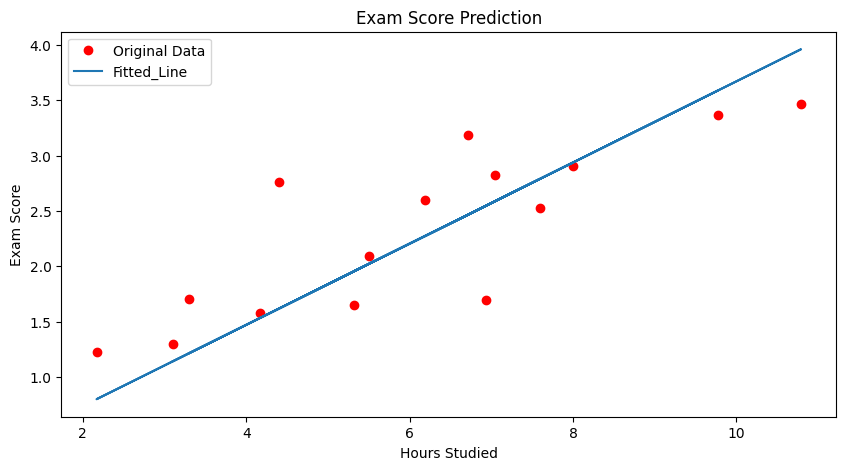

In [19]:
fig=plt.figure(figsize=(10,5))
plt.plot(x_train.numpy(),y_train.numpy(),'ro',label='Original Data')
plt.plot(x_train.numpy(),predict,label='Fitted_Line')
plt.xlabel('Hours Studied')
plt.ylabel('Exam Score')
plt.legend()
plt.title('Exam Score Prediction')
plt.show()

In [20]:
model.state_dict()

OrderedDict([('linear.weight', tensor([[0.3670]])),
             ('linear.bias', tensor([0.0017]))])

In [21]:
list(model.parameters())

[Parameter containing:
 tensor([[0.3670]], requires_grad=True),
 Parameter containing:
 tensor([0.0017], requires_grad=True)]

## **6. Test model with new data point**

In [22]:
new_hours_studied=8
new_hours_tensor=torch.tensor([[new_hours_studied]],dtype=torch.float32)

In [23]:
model.eval()
with torch.no_grad():
  new_exam_score=model(new_hours_tensor)
print('predicted exam score for a student who studied for 8 hours', new_exam_score.item())

predicted exam score for a student who studied for 8 hours 2.938070058822632


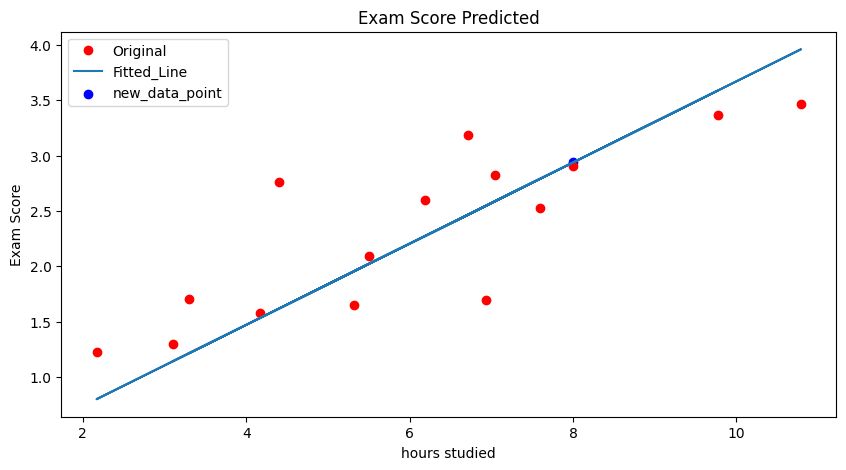

In [24]:
fig=plt.figure(figsize=(10,5))
plt.plot(x_train.numpy(),y_train.numpy(),'ro',label='Original')
plt.plot(x_train.numpy(),predict,label='Fitted_Line')
plt.scatter([new_hours_studied],[new_exam_score.item()],color='blue',label='new_data_point')
plt.xlabel('hours studied')
plt.ylabel('Exam Score')
plt.legend()
plt.title('Exam Score Predicted')
plt.show()

In [25]:
model.state_dict()

OrderedDict([('linear.weight', tensor([[0.3670]])),
             ('linear.bias', tensor([0.0017]))])

## **7. Save the model**

In [26]:
torch.save(model.state_dict(),'./linearRegression.pth')